In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from src import plotting
from IPython import display
from ai_economist import foundation

Inside covid19_components.py: 1 GPUs are available.
Inside covid19_env.py: 1 GPUs are available.


In [6]:
env_config = {
    # Scenario
    "scenario_name": "layout_from_file/simple_wood_and_stone",
    "env_layout_file": "quadrant_25x25_20each_30clump.txt",
    "starting_agent_coin": 10,
    "fixed_four_skill_and_loc": True,
    # Components
    "components": [
        ("Build", {"skill_dist": "pareto", "payment_max_skill_multiplier": 3}),
        ("ContinuousDoubleAuction", {"max_num_orders": 5}),
        ("Gather", {}),
    ],
    # Standard Arguments
    "n_agents": 4,
    "world_size": [25, 25],
    "episode_length": 1000,
    "multi_action_mode_agents": False,
    "multi_action_mode_planner": True,
    "flatten_observations": False,
    "flatten_masks": True,
}

In [7]:
env = foundation.make_env_instance(**env_config)

In [17]:
observation = env.reset()

In [14]:
def sample_random_action(agent, mask):
    """Sample random UNMASKED action(s) for agent."""
    # Return a list of actions: 1 for each action subspace
    if agent.multi_action_mode:
        agent_action_space = agent.action_spaces.cumsum()[:-1]
        split_masks = np.split(mask, agent_action_space)
        
        return [
            np.random.choice(np.arange(len(m_)), p=m_ / m_.sum()) for m_ in split_masks
        ]

    # Return a single action
    else:
        return np.random.choice(np.arange(agent.action_spaces), p=mask / mask.sum())


def sample_random_actions(env, obs):
    """Samples random UNMASKED actions for each agent in obs."""

    actions = {
        a_idx: sample_random_action(env.get_agent(a_idx), a_obs["action_mask"])
        for a_idx, a_obs in obs.items()
    }

    return actions

In [18]:
actions = sample_random_actions(env, observation)

In [19]:
observation, reward, done, info = env.step(actions)

In [25]:
observation["0"].keys()

dict_keys(['world-map', 'world-idx_map', 'world-loc-row', 'world-loc-col', 'world-inventory-Coin', 'world-inventory-Stone', 'world-inventory-Wood', 'time', 'Build-build_payment', 'Build-build_skill', 'ContinuousDoubleAuction-market_rate-Stone', 'ContinuousDoubleAuction-price_history-Stone', 'ContinuousDoubleAuction-available_asks-Stone', 'ContinuousDoubleAuction-available_bids-Stone', 'ContinuousDoubleAuction-my_asks-Stone', 'ContinuousDoubleAuction-my_bids-Stone', 'ContinuousDoubleAuction-market_rate-Wood', 'ContinuousDoubleAuction-price_history-Wood', 'ContinuousDoubleAuction-available_asks-Wood', 'ContinuousDoubleAuction-available_bids-Wood', 'ContinuousDoubleAuction-my_asks-Wood', 'ContinuousDoubleAuction-my_bids-Wood', 'Gather-bonus_gather_prob', 'action_mask'])

In [44]:
def do_plot(env, ax, fig):
    """Plots world state during episode sampling."""
    plotting.plot_env_state(env, ax)
    ax.set_aspect("equal")
    display.display(fig)
    display.clear_output(wait=True)


def play_random_episode(env, plot_every=100, do_dense_logging=False):
    """Plays an episode with randomly sampled actions.

    Demonstrates gym-style API:
        obs                  <-- env.reset(...)         # Reset
        obs, rew, done, info <-- env.step(actions, ...) # Interaction loop

    """
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    # Reset
    obs = env.reset(force_dense_logging=do_dense_logging)

    # Interaction loop (w/ plotting)
    for t in range(env.episode_length):
        actions = sample_random_actions(env, obs)
        obs, rew, done, info = env.step(actions)

        if ((t + 1) % plot_every) == 0:
            do_plot(env, ax, fig)

    if ((t + 1) % plot_every) != 0:
        do_plot(env, ax, fig)

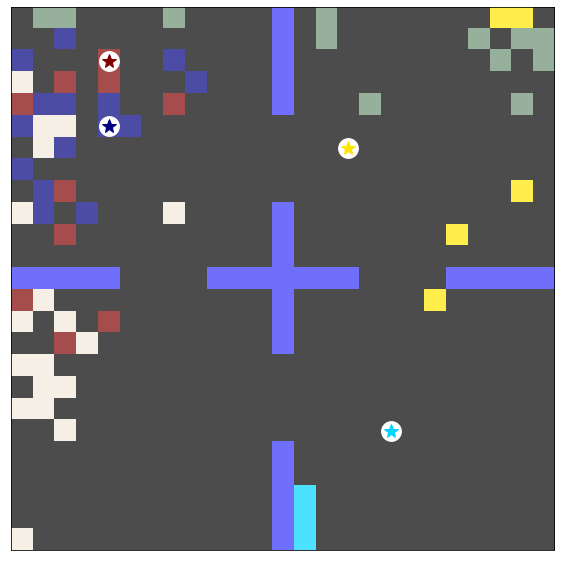

In [46]:
play_random_episode(env, plot_every=10, do_dense_logging=True)

In [48]:
dense_log = env.previous_episode_dense_log

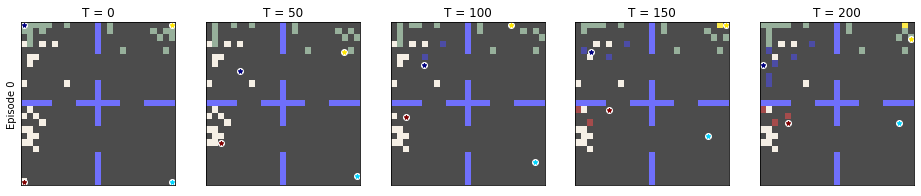

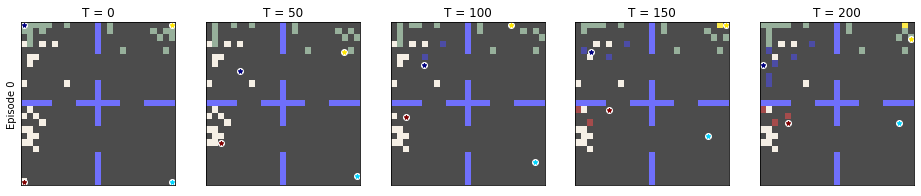

In [50]:
fig = plotting.vis_world_range(dense_log, t0=0, tN=200, N=5)